In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

## EDA

Declaring useful functions

In [3]:
def clean_data(data_path : str, columns_to_drop : list[str] | str = [], drop_duplicates : bool = True, drop_missing : bool = True) -> pd.DataFrame:
    df = pd.read_csv(data_path)
    if columns_to_drop != []:
        df = df.drop(columns_to_drop, axis = 1)
    if drop_duplicates:
        df = df.drop_duplicates()
    if drop_missing:
        df = df.dropna()
    return df

def split_columns(data_frame : pd.DataFrame) -> tuple[list, list]:
    numeric_columns = data_frame.select_dtypes(include=[np.number]).columns.tolist()
    print("Numeric columns:", numeric_columns)
    categorical_columns = data_frame.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
    print("Categorical columns:", categorical_columns)


    return numeric_columns, categorical_columns

In [4]:
df_lake = clean_data('data/raw/Lake_Bilancino.csv', 'Temperature_Le_Croci')
df_lake = df_lake.set_index("Date")


df_lake.to_csv("data/clean/Lake_Bilancino.csv")
df_lake

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,
01/01/2004,0.0,0.0,0.4,0.0,0.0,251.14,0.5
02/01/2004,0.0,0.0,0.0,0.0,0.0,251.21,0.5
03/01/2004,0.0,0.0,0.0,0.0,0.0,251.28,0.5
04/01/2004,0.0,0.0,0.0,0.0,0.0,251.35,0.5
05/01/2004,0.2,0.0,0.0,0.0,0.0,251.37,0.5
...,...,...,...,...,...,...,...
26/06/2020,0.0,0.0,0.0,0.0,0.0,250.85,0.6
27/06/2020,0.0,0.0,0.0,0.0,0.0,250.84,0.6
28/06/2020,0.0,0.0,0.0,0.0,0.0,250.83,0.6


In [10]:
df_river = clean_data('data/raw/River_Arno.csv')
df_river = df_river.set_index("Date")
df_river = df_river[['Hydrometry_Nave_di_Rosano']]

df_river.to_csv("data/clean/River_Arno.csv")
df_river

,Hydrometry_Nave_di_Rosano
Date,
01/01/2004,1.84
02/01/2004,1.93
03/01/2004,1.61
04/01/2004,1.35
05/01/2004,1.44
...,...
02/07/2007,0.99
03/07/2007,1.01
04/07/2007,1.03


In [5]:
df_aquifer_auser = clean_data('data/raw/Aquifer_Auser.csv')
df_aquifer_auser = df_aquifer_auser.set_index("Date")
df_aquifer_auser = df_aquifer_auser[['Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_LT2']]

df_aquifer_doganella = clean_data('data/raw/Aquifer_Doganella.csv')
df_aquifer_doganella = df_aquifer_doganella.set_index("Date")
doganella_columns = []
for i in range(1, 10):
    doganella_columns.append(f'Depth_to_Groundwater_Pozzo_{i}')
df_aquifer_doganella = df_aquifer_doganella[doganella_columns]

df_aquifer_luco = clean_data('data/raw/Aquifer_Luco.csv')
df_aquifer_luco = df_aquifer_luco.set_index("Date")
df_aquifer_luco = df_aquifer_luco[['Depth_to_Groundwater_Podere_Casetta']]

df_aquifer_petrignano = clean_data('data/raw/Aquifer_Petrignano.csv')
df_aquifer_petrignano = df_aquifer_petrignano.set_index("Date")
df_aquifer_petrignano = df_aquifer_petrignano[['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']]


for data_frame, name in [(df_aquifer_auser, 'Aquifer_Auser'), (df_aquifer_doganella, 'Aquifer_Doganella'),\
 (df_aquifer_luco, 'Aquifer_Luco'), (df_aquifer_petrignano, 'Aquifer_Petrignano')]:
    data_frame.to_csv(f"data/clean/{name}.csv")



In [6]:
df_spring_amiata = clean_data('data/raw/Water_Spring_Amiata.csv')
df_spring_amiata = df_spring_amiata.set_index("Date")
df_spring_amiata = df_spring_amiata[['Flow_Rate_Bugnano', 'Flow_Rate_Arbure',\
                                      'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']]

df_spring_madonna = clean_data('data/raw/Water_Spring_Madonna_di_Canneto.csv')
df_spring_madonna = df_spring_madonna.set_index("Date")
df_spring_madonna = df_spring_madonna[['Flow_Rate_Madonna_di_Canneto']]

df_spring_lupa = clean_data('data/raw/Water_Spring_Lupa.csv')
df_spring_lupa = df_spring_lupa.set_index("Date")
df_spring_lupa = df_spring_lupa[['Flow_Rate_Lupa']]

for data_frame, name in [(df_spring_amiata, 'Water_Spring_Amiata'), (df_spring_madonna, 'Water_Spring_Madonna_di_Canneto'),\
 (df_spring_lupa, 'Water_Spring_Lupa')]:
    data_frame.to_csv(f"data/clean/{name}.csv")

In [7]:
numeric_variables, categorical_variables = split_columns(df_lake)

Numeric columns: ['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Lake_Level', 'Flow_Rate']
Categorical columns: []


In [8]:
numeric_variables, categorical_variables = split_columns(df_aquifer_auser)

Numeric columns: ['Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_LT2']
Categorical columns: []


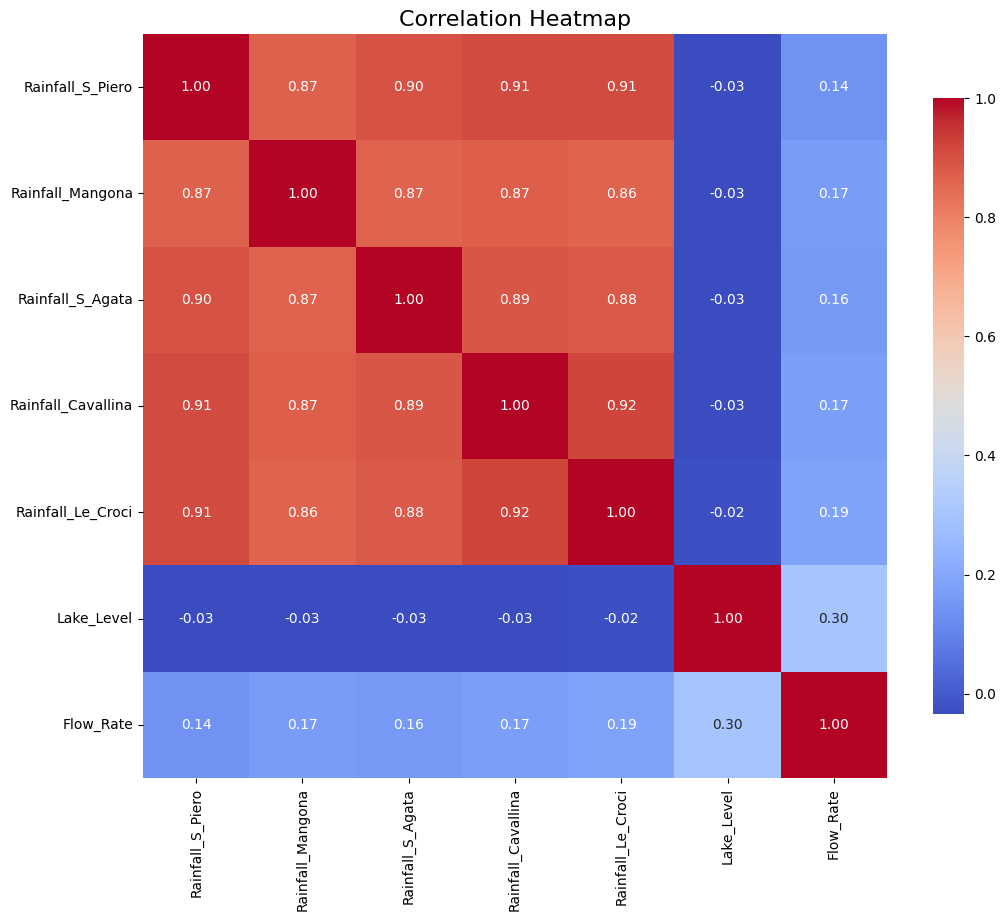

In [9]:
correlation_matrix = df_lake.corr()
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,             # Annotate cells with correlation values
            fmt='.2f',             # Format of the annotation
            cmap='coolwarm',       # Color palette
            square=True,           # Make squares square-shaped
            cbar_kws={"shrink": .8}  # Color bar size
           )

# Add a title
plt.title('Correlation Heatmap', fontsize=16)

# Show the heatmap
plt.show()